In [1]:
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [2]:
# Ensure that NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [3]:
LINES = ['-', ':', '--']  # Line style for plots

First 1000 characters of each text:
Doyle: ﻿Chapter 1.
Mr. Sherlock Holmes


      Mr. Sherlock Holmes, who was usually very late in the mornings,
      save upon those not infrequent occasions when he was up all
      night, was seated at the breakfast table. I stood upon the
      hearth-rug and picked up the stick which our visitor had left
      behind him the night before. It was a fine, thick piece of wood,
      bulbous-headed, of the sort which is known as a “Penang lawyer.”
      Just under the head was a broad silver band nearly an inch
      across. “To James Mortimer, M.R.C.S., from his friends of the
      C.C.H.,” was engraved upon it, with the date “1884.” It was just
      such a stick as the old-fashioned family practitioner used to
      carry—dignified, solid, and reassuring.

      “Well, Watson, what do you make of it?”

      Holmes was sitting with his back to me, and I had given him no
      sign of my occupation.

      “How did you know what I was doing? I bel

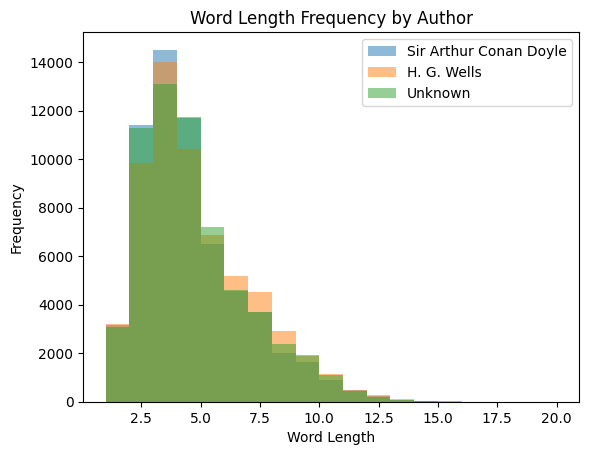

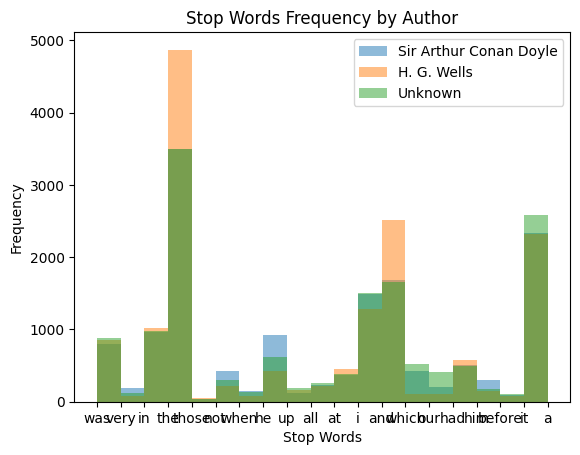

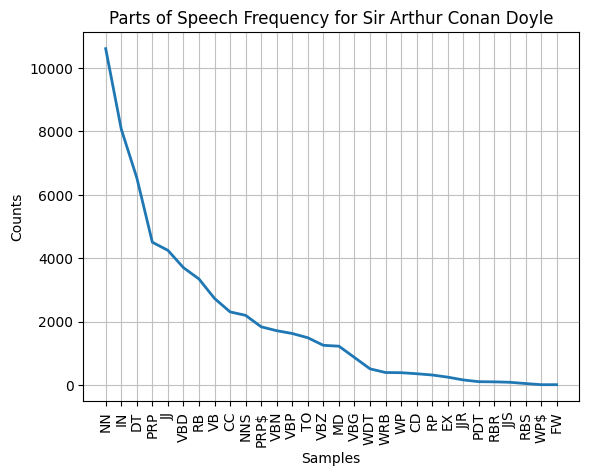

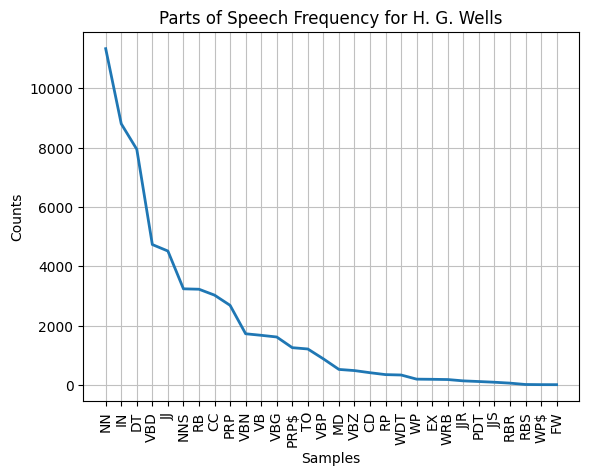

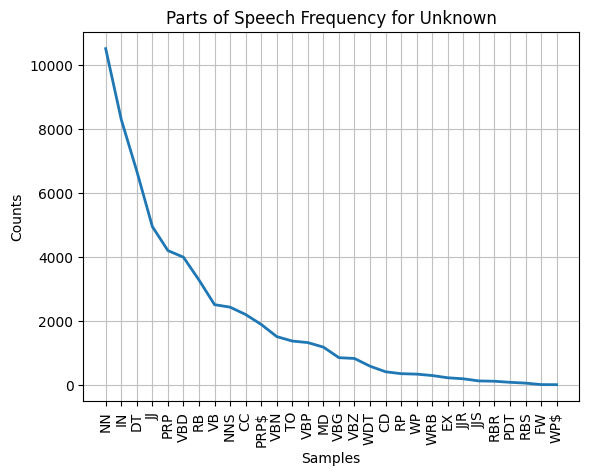

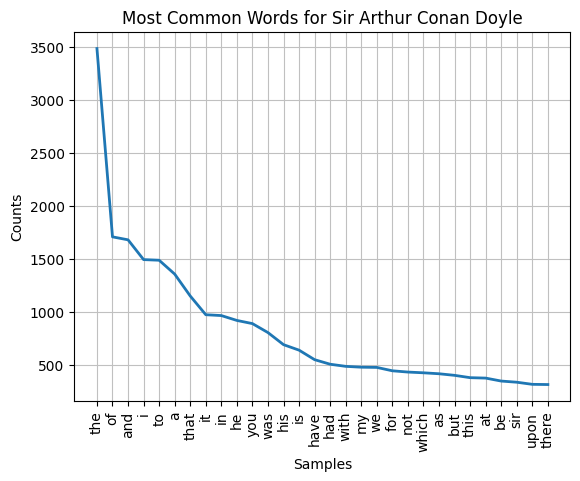

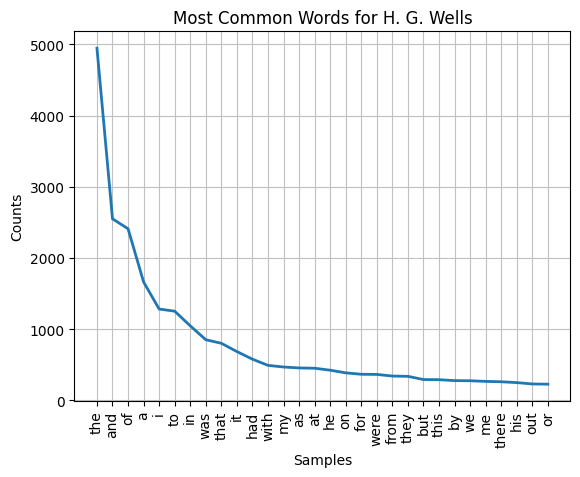

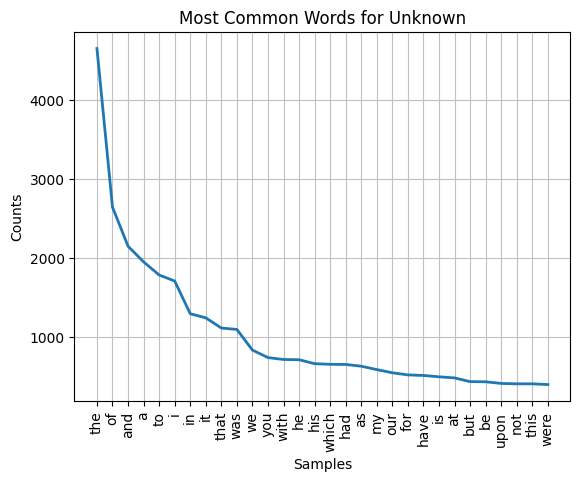

Jaccard Similarity between Unknown and Sir Arthur Conan Doyle: 0.344298006753077
Jaccard Similarity between Unknown and H. G. Wells: 0.31035491419656785
Jaccard Similarity between Unknown and Sir Arthur Conan Doyle: 0.344298006753077
Jaccard Similarity between Unknown and H. G. Wells: 0.31035491419656785

The unknown text is most likely written by: Sir Arthur Conan Doyle


In [42]:
def main():
    # Reading the text files
    strings_by_author = dict()
    strings_by_author['Sir Arthur Conan Doyle'] = text_to_string('hound.txt')
    strings_by_author['H. G. Wells'] = text_to_string('war.txt')
    strings_by_author['Unknown'] = text_to_string('lost.txt')

    print("First 1000 characters of each text:")
    print("Doyle:", strings_by_author['Sir Arthur Conan Doyle'][:1000])
    print()
    print("Wells:", strings_by_author['H. G. Wells'][:1000])
    print()
    print("Unknown:", strings_by_author['Unknown'][:1000])
    print()

    # Tokenize words by author
    words_by_author = make_word_dict(strings_by_author)
    len_shortest_corpus = find_shortest_corpus(words_by_author)

    # Perform tests
    word_length_test(words_by_author, len_shortest_corpus)
    stopwords_test(words_by_author, len_shortest_corpus)
    parts_of_speech_test(words_by_author, len_shortest_corpus)
    vocab_test(words_by_author)
    jaccard_test(words_by_author, len_shortest_corpus)

    # Determine the author of the unknown text
    determine_author(words_by_author, len_shortest_corpus)

def text_to_string(filename):
    """Read a text file and return a string."""
    with open(filename, encoding='utf-8') as infile:
        return infile.read()

def make_word_dict(strings_by_author):
    """Return dictionary of tokenized words by corpus by author."""
    words_by_author = dict()
    for author in strings_by_author:
        tokens = nltk.word_tokenize(strings_by_author[author])
        words_by_author[author] = [token.lower() for token in tokens if token.isalpha()]
    return words_by_author

def find_shortest_corpus(words_by_author):
    """Find the length of the shortest corpus."""
    return min(len(words) for words in words_by_author.values())

def word_length_test(words_by_author, len_shortest_corpus):
    """Analyze word length frequency."""
    lines = ['-', ':', '--']  # Reset LINES for each plot
    for i, author in enumerate(words_by_author):
        words = words_by_author[author][:len_shortest_corpus]
        word_lengths = [len(word) for word in words]
        plt.hist(word_lengths, bins=range(1, 21), alpha=0.5, label=author, linestyle=lines[i])
    plt.legend(loc='upper right')
    plt.xlabel('Word Length')
    plt.ylabel('Frequency')
    plt.title('Word Length Frequency by Author')
    plt.show()

def stopwords_test(words_by_author, len_shortest_corpus):
    """Analyze stopwords frequency."""
    lines = ['-', ':', '--']  # Reset LINES for each plot
    stop_words = set(stopwords.words('english'))
    for i, author in enumerate(words_by_author):
        words = words_by_author[author][:len_shortest_corpus]
        stop_words_count = [word for word in words if word in stop_words]
        plt.hist(stop_words_count, bins=range(1, 21), alpha=0.5, label=author, linestyle=lines[i])
    plt.legend(loc='upper right')
    plt.xlabel('Stop Words')
    plt.ylabel('Frequency')
    plt.title('Stop Words Frequency by Author')
    plt.show()

def parts_of_speech_test(words_by_author, len_shortest_corpus):
    """Analyze parts of speech frequency."""
    for author in words_by_author:
        words = words_by_author[author][:len_shortest_corpus]
        pos_tags = nltk.pos_tag(words)
        pos_counts = nltk.FreqDist(tag for (word, tag) in pos_tags)
        pos_counts.plot(30, cumulative=False, title=f'Parts of Speech Frequency for {author}')

def vocab_test(words_by_author):
    """Analyze most common words."""
    for author in words_by_author:
        fdist = nltk.FreqDist(words_by_author[author])
        fdist.plot(30, cumulative=False, title=f'Most Common Words for {author}')

def jaccard_test(words_by_author, len_shortest_corpus):
    """Analyze Jaccard similarity."""
    def jaccard_similarity(list1, list2):
        set1, set2 = set(list1), set(list2)
        return len(set1 & set2) / len(set1 | set2)

    similarities = {}
    unknown_words = words_by_author['Unknown'][:len_shortest_corpus]
    for author in ['Sir Arthur Conan Doyle', 'H. G. Wells']:
        known_words = words_by_author[author][:len_shortest_corpus]
        similarity = jaccard_similarity(unknown_words, known_words)
        similarities[author] = similarity
        print(f'Jaccard Similarity between Unknown and {author}: {similarity}')

    return similarities

def determine_author(words_by_author, len_shortest_corpus):
    """Determine the author of the unknown text based on Jaccard similarity."""
    similarities = jaccard_test(words_by_author, len_shortest_corpus)
    likely_author = max(similarities, key=similarities.get)
    print(f'\nThe unknown text is most likely written by: {likely_author}')

if __name__ == '__main__':
    main()